In [1]:
import tensorflow as tf
import pandas as pd

2023-03-12 22:48:18.167078: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/root/miniconda3/envs/tfdml_plugin/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-03-12 22:48:19.314769: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2023-03-12 22:48:19.314840: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2023-03-12 22:48:19.317314: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2023

In [2]:
oilDf = pd.read_csv("oil.csv")

In [3]:
import matplotlib.pyplot as plt

In [4]:
oilDf.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [5]:
oilDf.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
len(oilDf[oilDf["dcoilwtico"].isna()==True])

43

In [7]:
oilDf[oilDf["dcoilwtico"].isna()==True]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


<AxesSubplot:>

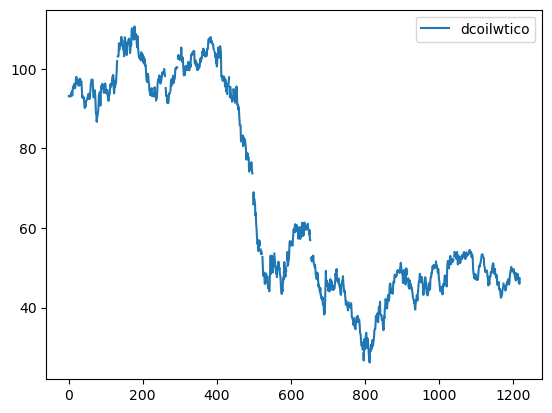

In [8]:
oilDf.plot()

In [9]:
days = oilDf["date"].values
oilPrice = oilDf["dcoilwtico"].values

In [10]:
def create_datetimesteps(days):
    timesteps = []
    for d in days:
        timesteps.append(datetime.strptime(d, "%Y-%m-%d"))
    return timesteps

In [11]:
from datetime import datetime

timesteps = create_datetimesteps(days)


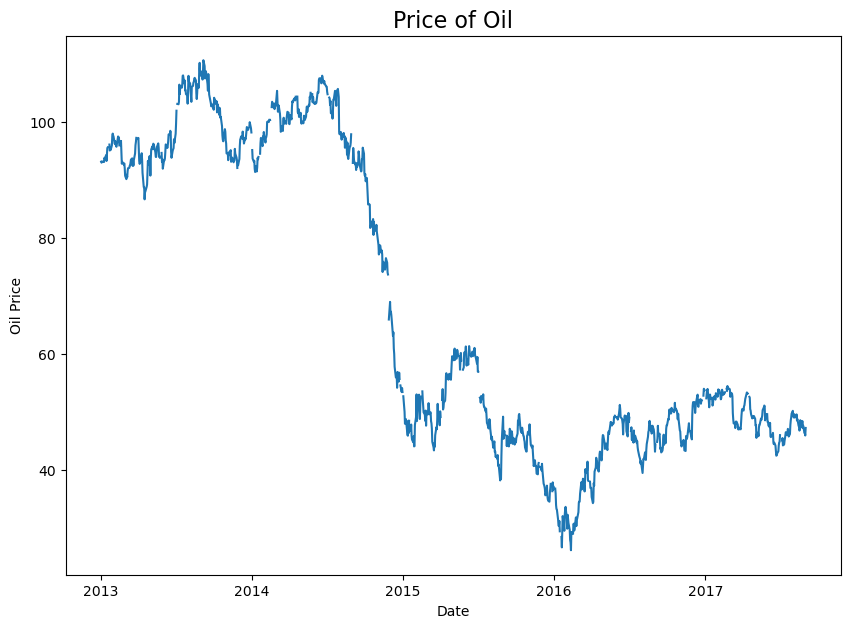

In [12]:
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, oilPrice)
plt.title("Price of Oil", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Oil Price");

In [13]:
for i in range(len(oilPrice)):
    if np.isnan(oilPrice[i]):
        if i ==0:
            oilPrice[i] = oilPrice[i+1]
        elif i == len(oilPrice):
            oilPrice[i] = oilPrice[i-1]
        else:
            oilPrice[i] = (oilPrice[i-1] + oilPrice[i+1])/2

In [14]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [15]:
train_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [16]:
date_sales = train_df["date"].values
timesteps_sales = create_datetimesteps(date_sales)
train_sales = train_df["sales"].values

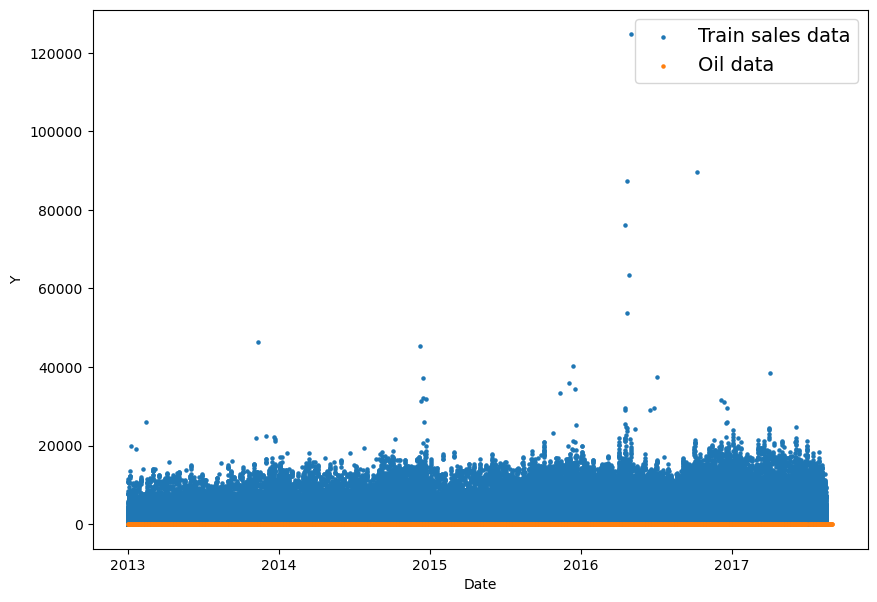

In [17]:
plt.figure(figsize=(10, 7))
plt.scatter(timesteps_sales, train_sales, s=5, label="Train sales data")
plt.scatter(timesteps, oilPrice, s=5, label="Oil data")
plt.xlabel("Date")
plt.ylabel("Y")
plt.legend(fontsize=14)
plt.show()

In [18]:
composite_df = train_df.merge(oilDf, how='left', on='date')

In [19]:
composite_df

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14
1,1,2013-01-01,1,BABY CARE,0.000,0,93.14
2,2,2013-01-01,1,BEAUTY,0.000,0,93.14
3,3,2013-01-01,1,BEVERAGES,0.000,0,93.14
4,4,2013-01-01,1,BOOKS,0.000,0,93.14
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57


In [38]:
HORIZON = 1
WINDOW_SIZE = 7

composite_df_windowed = composite_df.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  composite_df_windowed[f"dcoilwtico+{i+1}"] = composite_df_windowed["dcoilwtico"].shift(periods=i+1)

composite_df_windowed = composite_df_windowed.drop(["id"], axis=1)
composite_df_windowed.set_index("date",inplace=True)
composite_df_windowed.head(10)

,store_nbr,family,sales,onpromotion,dcoilwtico,dcoilwtico+1,dcoilwtico+2,dcoilwtico+3,dcoilwtico+4,dcoilwtico+5,dcoilwtico+6,dcoilwtico+7
date,,,,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,1,BABY CARE,0.0,0,93.14,93.14,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-01,1,BEAUTY,0.0,0,93.14,93.14,93.14,NaN,NaN,NaN,NaN,NaN
2013-01-01,1,BEVERAGES,0.0,0,93.14,93.14,93.14,93.14,NaN,NaN,NaN,NaN
2013-01-01,1,BOOKS,0.0,0,93.14,93.14,93.14,93.14,93.14,NaN,NaN,NaN
2013-01-01,1,BREAD/BAKERY,0.0,0,93.14,93.14,93.14,93.14,93.14,93.14,NaN,NaN
2013-01-01,1,CELEBRATION,0.0,0,93.14,93.14,93.14,93.14,93.14,93.14,93.14,NaN
2013-01-01,1,CLEANING,0.0,0,93.14,93.14,93.14,93.14,93.14,93.14,93.14,93.14
2013-01-01,1,DAIRY,0.0,0,93.14,93.14,93.14,93.14,93.14,93.14,93.14,93.14


In [39]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    # (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore",dtype=np.float32,sparse=False), ["store_nbr", "family"])
)



In [40]:

X = composite_df_windowed.dropna().drop("sales", axis=1) #.astype(np.float32) 
y = composite_df_windowed.dropna()["sales"]#.astype(np.float32)

In [41]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)


(1710790, 1710790, 427698, 427698)

In [42]:
ct.fit(X_train)
X_train_onehot = ct.transform(X_train)
X_test_onehot = ct.transform(X_test)

In [43]:
X_train_onehot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train_onehot)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test_onehot)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 87), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 87), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [50]:
from tensorflow.keras import layers

tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
# model_6.fit(X_train_onehot, y_train,
#             epochs=10,
#             batch_size=128,
#             # verbose=0, # only print 1 line per epoch
#             validation_data=(X_test_onehot, y_test))
#             # callbacks=[create_model_checkpoint(model_name=model_6.name)])
#             # 
model_6.fit(train_dataset,
            epochs=10,
            # batch_size=128,
            # verbose=0, # only print 1 line per epoch
            validation_data=(test_dataset))
            # callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/10


2023-03-13 01:08:16.517876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-13 01:08:16.599476: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-13 01:08:16.599544: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 21512 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-03-13 01:08:16.599618: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


1671/1671 [==============================] - ETA: 0s - loss: 247.9482

2023-03-13 01:08:31.344888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-13 01:08:31.376526: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-13 01:08:31.376587: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 21512 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-03-13 01:08:31.376622: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


1671/1671 [==============================] - 17s 10ms/step - loss: 247.9482 - val_loss: 323.7217
Epoch 2/10
1671/1671 [==============================] - 15s 9ms/step - loss: 195.6213 - val_loss: 267.7974
Epoch 3/10
1671/1671 [==============================] - 14s 9ms/step - loss: 166.4424 - val_loss: 233.0965
Epoch 4/10
1671/1671 [==============================] - 15s 9ms/step - loss: 150.2077 - val_loss: 213.6061
Epoch 5/10
1671/1671 [==============================] - 16s 10ms/step - loss: 143.5011 - val_loss: 206.1297
Epoch 6/10
1671/1671 [==============================] - 18s 11ms/step - loss: 140.3356 - val_loss: 202.9532
Epoch 7/10
1671/1671 [==============================] - 18s 11ms/step - loss: 137.6623 - val_loss: 200.8167
Epoch 8/10
1671/1671 [==============================] - 18s 11ms/step - loss: 135.1851 - val_loss: 198.9077
Epoch 9/10
1671/1671 [==============================] - 18s 11ms/step - loss: 133.0781 - val_loss: 197.0872
Epoch 10/10
1671/1671 [===================